# **Logistic Regression Assignment**

**Q1) What is Logistic Regression, and how does it differ from Linear
Regression?**

- Logistic Regression is a supervised learning algorithm used for binary (and with extensions, multiclass) classification tasks. It models the probability that a given input belongs to a particular class by fitting a logistic (sigmoid) function to a linear combination of the features.
- Unlike linear regression, which predicts continuous outcomes and minimizes squared errors, logistic regression predicts class probabilities constrained between 0 and 1 using the logistic function. The model estimates the log-odds (logit) of the probability as a linear function of input variables; taking the sigmoid converts log-odds to a probability. Decision boundaries are produced by applying a threshold commonly 0.5 to the predicted probability to obtain discrete class labels.
- Key advantages include interpretability—coefficients indicate how input features influence log-odds—and efficiency for linearly separable tasks.
- However, logistic regression assumes a linear relationship between features and the log-odds, and it can underperform on highly non-linear problems unless features are transformed. Regularization (L1/L2) is commonly used to prevent overfitting and to provide feature selection (L1).
- In practical use, logistic regression is the baseline for classification problems, useful for quick, interpretable models and as a building block in ensembles or pipelines. It also integrates well with preprocessing pipelines, handles numeric and categorical data with encoding, and is robust when classes are reasonably balanced.
- For imbalanced classes, probability calibration, resampling, or adjusted decision thresholds are needed to improve business-value metrics such as precision and recall.

**Q2) Explain the role of the Sigmoid function in Logistic Regression.**

- The Sigmoid function also called logistic function plays a central role in logistic regression by mapping the linear combination of input features to a probability between 0 and 1.
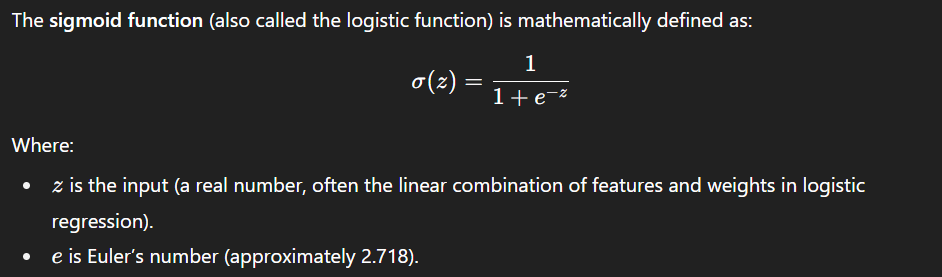

- After the model learns coefficients by optimizing a likelihood-based loss (usually the log-loss), the raw score z can be any real number, but σ(z) rescales that score to a value interpretable as the probability of belonging to the positive class.
- This probability output supports calibrated decisions and ranking, and it enables thresholding to produce discrete labels. The smooth, S-shaped curve ensures gradients exist everywhere, which is helpful for numerical optimization.
- Intuitively, large positive z values produce probabilities near 1, large negative z values produce probabilities near 0, and values near 0 map to probabilities around 0.5, reflecting uncertainty.
- The sigmoid’s derivative, σ(z)(1−σ(z)), also appears in optimization and informs the step size of updates during training. In summary, the sigmoid transforms linear predictions into interpretable probabilities, providing the probabilistic foundation for classification decisions and downstream business rules.

**Q3) What is Regularization in Logistic Regression and why is it needed?**

- Regularization in logistic regression is a technique used to prevent overfitting by penalizing large model coefficients during training. Common penalties are L2 (Ridge), which adds the squared magnitude of coefficients, and L1 (Lasso), which adds the absolute magnitude.
- The regularization term is added to the loss function so the model balances fit to the training data with coefficient magnitude. This discourages overly complex models that memorize noise, leading to better generalization on unseen data. L2 regularization tends to shrink weights smoothly, preserving correlated features, while L1 can drive some coefficients to zero and perform feature selection.
- Regularization strength is controlled by a hyperparameter (commonly denoted C in sklearn where smaller C = stronger regularization). It's especially important when the number of features is large relative to the number of samples, or when multicollinearity exists, because it stabilizes the solution and reduces variance. Without regularization, maximum likelihood estimates can be unstable and lead to high variance predictions.
- In practice, regularization is tuned via cross-validation to find the right bias-variance trade-off for the problem at hand.

**Q4) What are some common evaluation metrics for classification models, and
why are they important?**

- Common evaluation metrics for classification models include accuracy, precision, recall, F1-score, ROC-AUC, and confusion matrix-based measures. Accuracy measures the proportion of correctly predicted instances but can be misleading on imbalanced datasets.
- Precision is the positive predictive value that measures how many positively predicted instances are actually positive—important when false positives are costly.
- Recall i.e. sensitivity measures how many actual positives are captured—important when missing a positive is costly. The F1-score harmonizes precision and recall, giving a single metric when class balance between these two matters.
- ROC-AUC summarizes the trade-off between true positive rate and false positive rate across thresholds and is useful for ranking; PR-AUC (precision-recall area) is often more informative on highly imbalanced data. The confusion matrix provides a complete breakdown of TP, FP, TN, FN, helping stakeholders interpret types of errors. Selecting metrics aligned with business objectives (e.g., maximize recall for fraud detection, or precision for targeted marketing) is crucial.
- Additionally, calibration plots and cost-sensitive measures can be used when predicted probabilities need to reflect true likelihoods or when costs of different errors vary.

**Q5) Write a Python program that loads a CSV file into a Pandas DataFrame,
splits into train/test sets, trains a Logistic Regression model, and prints its accuracy.
(Use Dataset from sklearn package)**

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = load_breast_cancer(as_frame=True)
df = data.frame
X = df[data.feature_names]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model = LogisticRegression(max_iter=10000, solver='liblinear', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', round(acc,4))

Accuracy: 0.9561


**Q6) Write a Python program to train a Logistic Regression model using L2
regularization (Ridge) and print the model coefficients and accuracy.**

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', max_iter=10000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
coefficients = model.coef_[0]
print('Accuracy:', round(acc,4))
print('Coefficients (first 10):', [round(c,4) for c in coefficients[:10]])

Accuracy: 0.9561
Coefficients (first 10): [np.float64(1.9304), np.float64(0.0715), np.float64(-0.0504), np.float64(-0.0017), np.float64(-0.1456), np.float64(-0.3813), np.float64(-0.5938), np.float64(-0.3039), np.float64(-0.2662), np.float64(-0.029)]


**Q7) Write a Python program to train a Logistic Regression model for multiclass
classification using multi_class='ovr' and print the classification report.
(Use Dataset from sklearn package)**

In [7]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

data = load_iris(as_frame=True)
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

model = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=10000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        12
           1     1.0000    0.6923    0.8182        13
           2     0.7647    1.0000    0.8667        13

    accuracy                         0.8947        38
   macro avg     0.9216    0.8974    0.8949        38
weighted avg     0.9195    0.8947    0.8922        38



**Q8) Write a Python program to apply GridSearchCV to tune C and penalty
hyperparameters for Logistic Regression and print the best parameters and validation accuracy.**

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split

data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

param_grid = {'C':[0.01, 0.1, 1], 'penalty':['l1','l2']}
clf = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=10000), param_grid, cv=3, scoring='accuracy', n_jobs=1)
clf.fit(X_train, y_train)
best = clf.best_params_
best_score = clf.best_score_
print('Best params:', best)
print('Best CV accuracy:', round(best_score,4))
best_model = clf.best_estimator_
print('Test accuracy:', round(best_model.score(X_test, y_test),4))

Best params: {'C': 1, 'penalty': 'l1'}
Best CV accuracy: 0.9494
Test accuracy: 0.9649


**Q9) Write a Python program to standardize the features before training Logistic
Regression and compare the model's accuracy with and without scaling.**

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Without scaling
model_no_scaling = LogisticRegression(max_iter=10000, solver='liblinear', random_state=42)
model_no_scaling.fit(X_train, y_train)
acc_no_scaling = accuracy_score(y_test, model_no_scaling.predict(X_test))

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model_scaled = LogisticRegression(max_iter=10000, solver='liblinear', random_state=42)
model_scaled.fit(X_train_scaled, y_train)
acc_scaled = accuracy_score(y_test, model_scaled.predict(X_test_scaled))

print('Accuracy without scaling:', round(acc_no_scaling,4))
print('Accuracy with scaling   :', round(acc_scaled,4))

Accuracy without scaling: 0.9561
Accuracy with scaling   : 0.9825


**Q10) Imagine you are working at an e-commerce company that wants to
predict which customers will respond to a marketing campaign. Given an imbalanced dataset (only 5% of customers respond), describe the approach you’d take to build a Logistic Regression model — including data handling, feature scaling, balancing classes, hyperparameter tuning, and evaluating the model for this real-world business use case.**

- For an e-commerce marketing campaign with a highly imbalanced response rate (~5%), a careful end-to-end approach is required. Begin with data understanding and cleaning: verify labels, handle missing values, and engineer features like recency, frequency, monetary value, browsing behavior, campaign exposure.
- Use domain-driven features and interactions to help linear models. Scale numeric features StandardScaler so regularized logistic regression treats coefficients comparably. Address class imbalance with techniques like stratified sampling, resampling SMOTE for oversampling the minority, or combined over/under-sampling, and class-weight adjustments set class_weight='balanced' or supply inverse-frequency weights so the optimizer penalizes mistakes on the minority class more. Use cross-validation with stratification to tune hyperparameters like C for regularization strength, penalty type, solver and potentially threshold tuning to optimize business metrics (e.g., precision@k or lift). Evaluate using precision, recall, F1, PR-AUC, and business-focused KPIs such as expected campaign ROI or uplift. Use calibration to ensure predicted probabilities align with real conversion rates.
- Finally, deploy with monitoring: track model drift, recalibrate or retrain periodically, and run A/B tests to measure real-world impact while controlling for cost-per-conversion.